In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

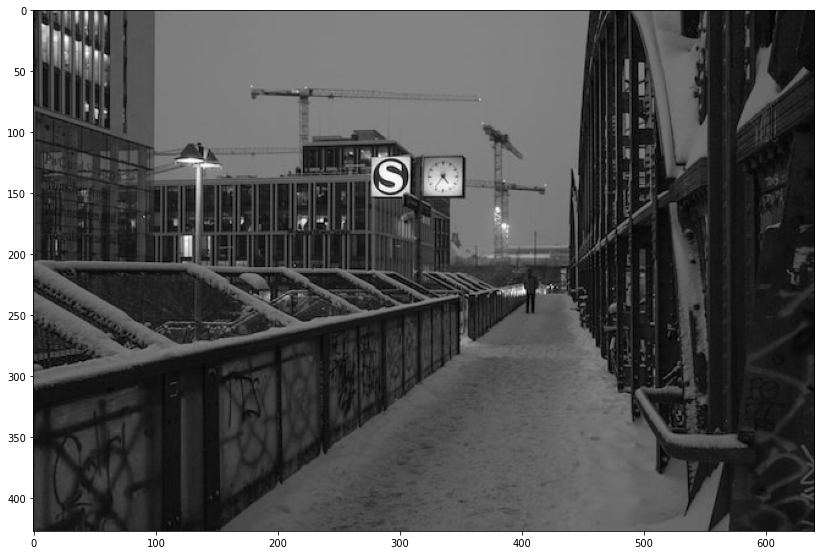

In [83]:
img1 = cv2.imread('../static/images/img3.jpg',0)
plt.figure(figsize=(14, 18))
plt.imshow(img1 , cmap='gray')

In [84]:
img1_fft = np.fft.fftshift(np.fft.fft2(img1))
img1_amplitude = np.sqrt(np.real(img1_fft) ** 2 + np.imag(img1_fft) ** 2)
img1_phase = np.arctan2(np.imag(img1_fft), np.real(img1_fft))

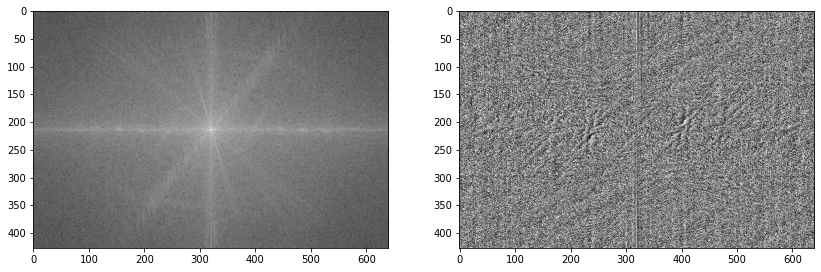

In [85]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(img1_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(img1_phase, cmap='gray')

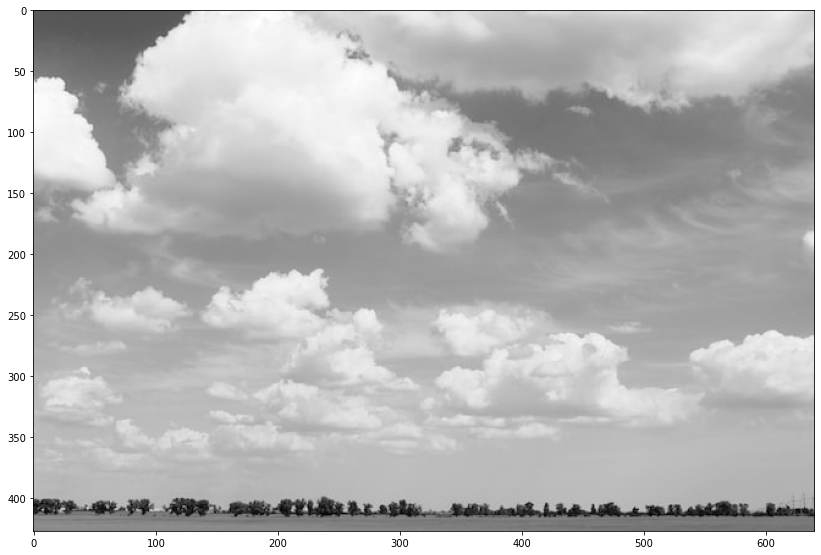

In [86]:
img2 = cv2.imread('../static/images/img2.jpg',0)
plt.figure(figsize=(14, 18))
plt.imshow(img2,cmap='gray')

In [87]:
img2_fft = np.fft.fftshift(np.fft.fft2(img2))
img2_amplitude = np.sqrt(np.real(img2_fft) ** 2 + np.imag(img2_fft) ** 2)
img2_phase = np.arctan2(np.imag(img2_fft), np.real(img2_fft))

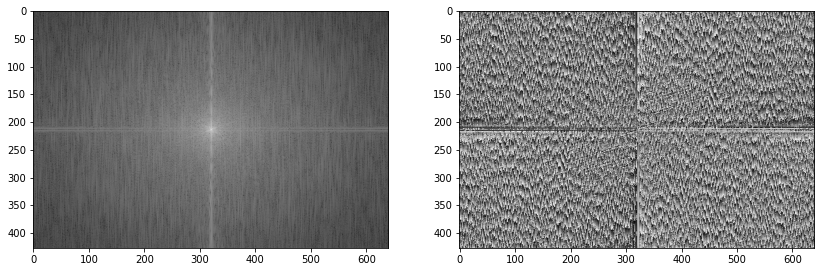

In [88]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(img2_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(img2_phase, cmap='gray')

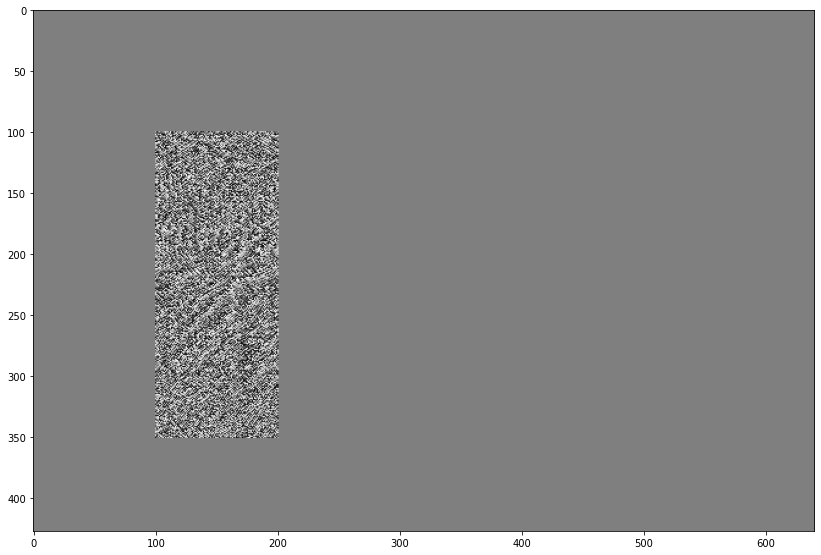

In [89]:
w = 100
h = 250
for x in range (0,img1_phase.shape[0]):
    for y in range(0,img1_phase.shape[1]):
        if (x>=100 and x<=100+h )and(y>=100 and y<=100+w):
            pass
        else:
            img1_phase[x][y] = 0

plt.figure(figsize=(14,18))
plt.imshow(img1_phase,cmap='gray')

In [90]:
comb = np.multiply(img2_amplitude, np.exp(1j * img1_phase))
trans = np.real(np.fft.ifft2(np.fft.ifftshift(comb)))

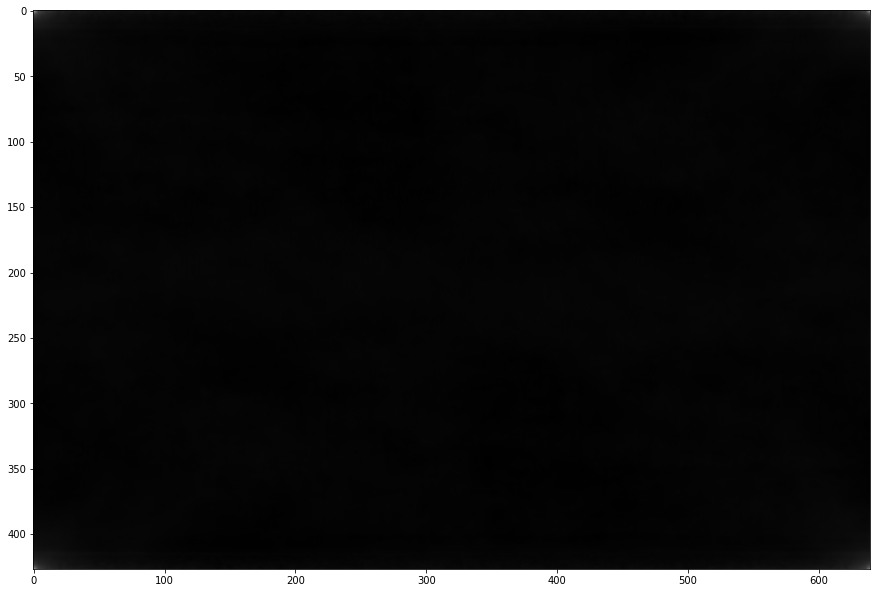

In [91]:
plt.figure(figsize=(15, 20))
plt.imshow(np.abs(trans), cmap='gray')

In [92]:
plt.imsave('result.jpg',trans,cmap='gray')